<font size="+3"><strong> Clustering with Two Features</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils.validation import check_is_fitted
from ipywidgets import widgets

pd.set_option('future.no_silent_downcasting', True)

# Prepare Data

## Import

Consider subset data `"Interactions with Customer Service"`.

Read the file into a DataFrame, subsets the data to Premiums from Interactions with Customer Service with a Phone Call, and returns the subset DataFrame.

In [2]:
# df = pd.read_csv("customer_segmentation_data.csv")
df = pd.read_csv("customer_segmentation_data-encoded.csv")

print("df type:", type(df))
print("df shape:", df.shape)
df.head(2)

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (53503, 20)


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,0,1,2,Mizoram,7,70541,4,4/10/2018,5,2,366603,2749,1,2,1,4,3,1
1,95568,26,1,4,5,Goa,5,54168,4,11/6/2018,1,1,780236,1966,1,1,1,2,2,1


## Split

<b> Split </b>

Create the feature matrix X. It should contain two features only: `Occupation` and `AGECL`.

In [6]:
X = df[["Income Level", "Premium Amount"]]

print("X type:", type(X))
print("X shape:", X.shape)
X.head(2)

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (53503, 2)


,Income Level,Premium Amount
0,70541,2749
1,54168,1966


# Build Model

## Iterate

Build a KMeans model, assign it to the variable name model, and fit it to the training data X.

In [7]:
# Build model
model = KMeans(n_clusters=3, random_state=42)
print("model type:", type(model))

# Fit model to data
model.fit(X)

model type: <class 'sklearn.cluster._kmeans.KMeans'>


KMeans(n_clusters=3, random_state=42)

In [8]:
labels = model.labels_
print("labels type:", type(labels))
print("labels shape:", labels.shape)
labels[:10]

labels type: <class 'numpy.ndarray'>
labels shape: (53503,)


array([2, 1, 2, 2, 1, 2, 2, 1, 0, 1])

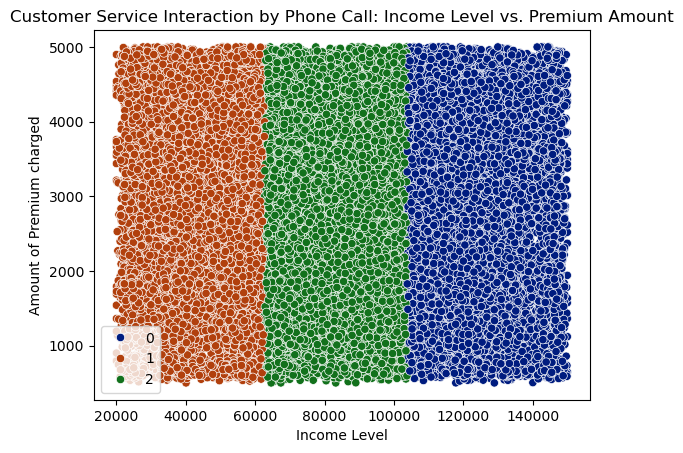

In [9]:
# Plot "Income Level" vs "Premium Amount" with hue=label
sns.scatterplot(x=df["Income Level"], 
                y=df["Premium Amount"],
                hue = labels,
                palette="dark")

plt.xlabel("Income Level")
plt.ylabel("Amount of Premium charged")
plt.title("Customer Service Interaction by Phone Call: Income Level vs. Premium Amount");

Extract the centroids that your model created during training, and assign them to the variable centroids.

In [10]:
centroids = model.cluster_centers_
print("centroids type:", type(centroids))
print("centroids shape:", centroids.shape)
centroids

centroids type: <class 'numpy.ndarray'>
centroids shape: (3, 2)


array([[125243.6165291 ,   3030.18478497],
       [ 43046.05876029,   3021.21789425],
       [ 82371.4703537 ,   3019.14694534]])

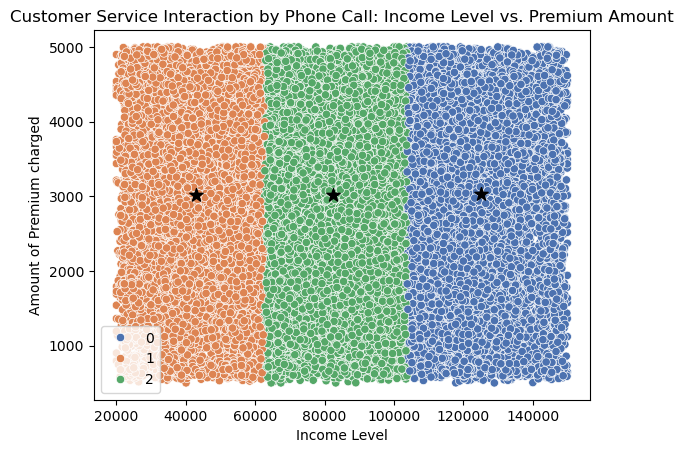

In [11]:
# Plot "Income Level" vs "Premium Amount", add centroids
sns.scatterplot(x=df["Income Level"], 
                y=df["Premium Amount"],
                hue = labels,
                palette="deep")

plt.scatter(
    x = centroids[:, 0],
    y = centroids[:, 1],
    color = "black",
    marker = "*",
    s = 100)

plt.xlabel("Income Level")
plt.ylabel("Amount of Premium charged")
plt.title("Customer Service Interaction by Phone Call: Income Level vs. Premium Amount");

Extract the inertia for your model and assign it to the variable inertia.

In [12]:
inertia = model.inertia_
print("inertia type:", type(inertia))
print("Inertia (3 clusters):", inertia)

inertia type: <class 'float'>
Inertia (3 clusters): 7902997865954.35


Calculate the silhouette score for your model and assign it to the variable ss.

In [13]:
ss = silhouette_score(X,model.labels_)
print("ss type:", type(ss))
print("Silhouette Score (3 clusters):", ss)

ss type: <class 'numpy.float64'>
Silhouette Score (3 clusters): 0.5874107205207711


Using a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive). Each time a model is trained, calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores.

In [14]:
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build model
    model = KMeans(n_clusters = k, random_state=42)
    # Train model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.inertia_)
    # Calculate ss
    silhouette_scores.append(silhouette_score(X, model.labels_))

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [16347722672589.234, 7902997865954.35, 4635098626344.194, 2781319805650.8154, 1885545323604.68, 1569292344948.4722, 1149993166052.724, 911628050062.988, 706768377385.0808, 641253752712.9506, 580929630050.012]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.6517153489920714, 0.5874107205207711, 0.5604660589109146, 0.5735858780018598, 0.5716273995168, 0.5566322919064208, 0.5456179600947609, 0.5428435577542531, 0.5523355713811722, 0.5295404156793976, 0.5195095516291024]


 Create a line plot that shows the values of inertia_errors as a function of n_clusters. x-axis "Number of Clusters",  y-axis "Inertia", title "K-Means Model: Inertia vs Number of Clusters".

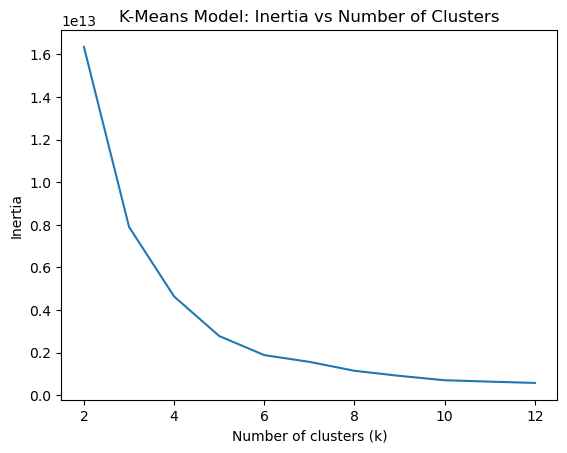

In [15]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

Create a line plot that shows the values of silhouette_scores as a function of n_clusters. Label x-axis "Number of Clusters", y-axis "Silhouette Score", and use the title "K-Means Model: Silhouette Score vs Number of Clusters".

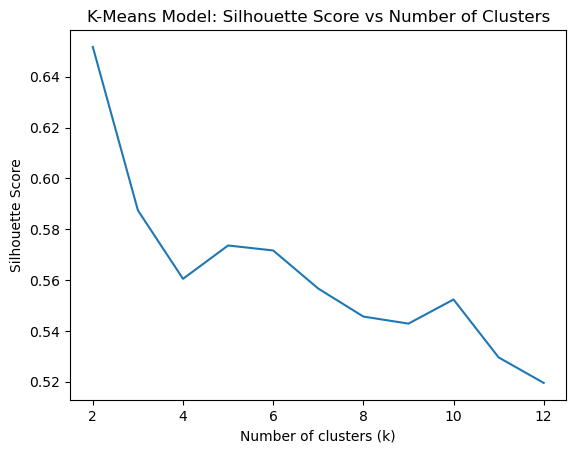

In [16]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

Build and train a new k-means model named final_model. Set an appropriate value for the n_clusters argument.

In [17]:
# Build model
final_model = KMeans(n_clusters = 4, random_state = 42)
print("final_model type:", type(final_model))

# Fit model to data
final_model.fit(X)

final_model type: <class 'sklearn.cluster._kmeans.KMeans'>


KMeans(n_clusters=4, random_state=42)

# Communicate

Scatter plot that shows the clusters that your final_model has assigned to the training data.

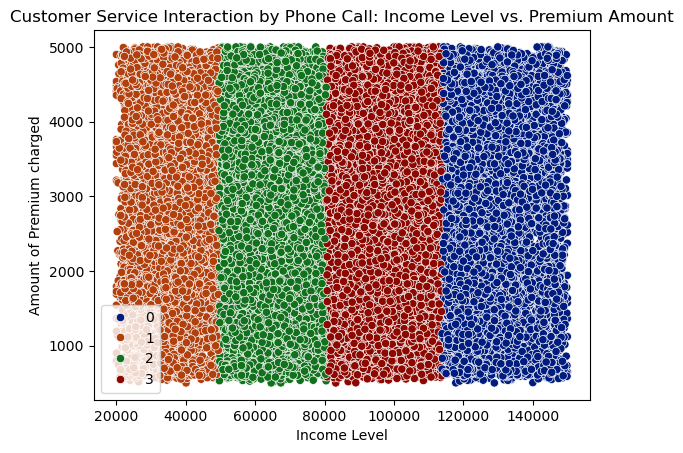

In [18]:
# Plot "Income Level" vs "Premium Amount" with hue=label
sns.scatterplot(x=df["Income Level"], 
                y=df["Premium Amount"],
                hue = final_model.labels_,
                palette="dark")

plt.xlabel("Income Level")
plt.ylabel("Amount of Premium charged")
plt.title("Customer Service Interaction by Phone Call: Income Level vs. Premium Amount");

Create a DataFrame xgb that contains the mean "Premium Amount" and "Income Level" values for each of the clusters in your final_model.

In [19]:
xgb = X.groupby(final_model.labels_).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 2)


,Income Level,Premium Amount
0,129837.204996,3010.202422
1,35790.673607,2999.620868
2,63165.507394,3048.093052
3,97584.516062,3035.074767


In [20]:
final_model.cluster_centers_

array([[129878.51534812,   3009.53899819],
       [ 35848.63109067,   3000.30800258],
       [ 63263.27701759,   3047.74755655],
       [ 97687.54164993,   3035.63868584]])

Create a side-by-side bar chart from xgb that shows the mean "Income Level" and "Premium Amount" values for each of the clusters in your final_model. Be sure to label the x-axis "Cluster", the y-axis "Premium Amount [Value]", and use the title "Mean Income Level & Premium Amount by Cluster".

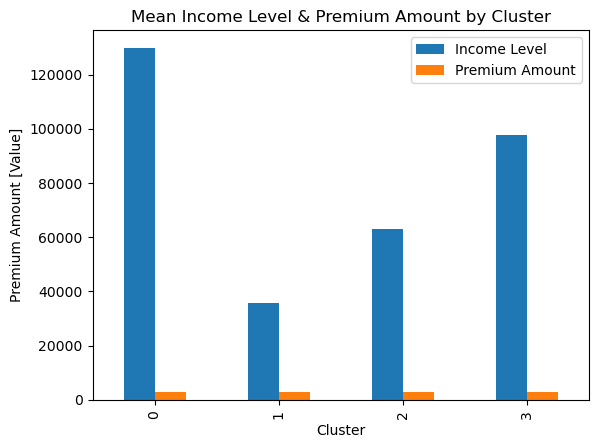

In [21]:
# Create side-by-side bar chart of `xgb`
(xgb).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Premium Amount [Value]")
plt.title("Mean Income Level & Premium Amount by Cluster");

<center>
<table>
  <tr>
    <th>Date (YYYY-MM-DD)</th>
    <th>Author</th>
  </tr>
  <tr>
    <td>2025-01-23</td>
    <td>Andrew Kalumba Harris</td>
  </tr>
</table>
</center>